In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [6]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Hypothesis: Gender and Age Group will be the best predictors for survivability.
#### We base this hypothesis off the anecdotal instructions of the Titanic crew stating "Women & Children First".

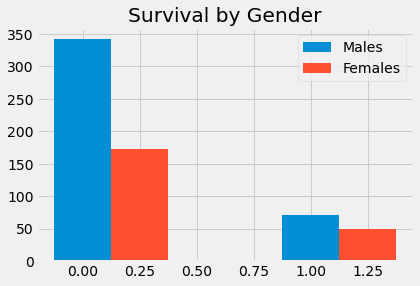

In [20]:
plt.style.use("fivethirtyeight")

#Adult Male vs. Female Survival Rate

#Categories
survival_x = ['Female', 'Male']

#Set width for Stacking
x_indexes = np.arange(len(survival_x))
width = .25

#Filter for Adult Males
maledf = df[((df['Sex'] == 'male') & (df['Age'] >= 15))]

#Value Counts for Survival Status
male_y = maledf['Survived'].value_counts()

#male survival counts
plt.bar(x_indexes,male_y, label = 'Males', width = width)


#Filter for Adult Males
femaledf = df[((df['Sex'] == 'female') & (df['Age'] >= 15))]

#Value Counts for Survival Status
female_y = femaledf['Survived'].value_counts()

#male survival counts
plt.bar(x_indexes+width,female_y, label = 'Females', width = width)

plt.legend()
plt.title("Survival by Gender")




plt.show()



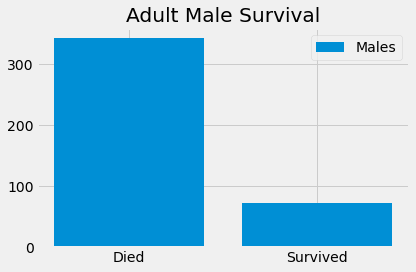

In [32]:
plt.style.use("fivethirtyeight")

#Adult Male vs. Female Survival Rate

#Categories
survival_x = ['Died', 'Survived']

#Filter for Adult Males
maledf = df[((df['Sex'] == 'male') & (df['Age'] >= 15))]

#Value Counts for Survival Status
male_y = maledf['Survived'].value_counts()

#male survival counts
plt.bar(survival_x,male_y, label = 'Males')

plt.legend()
plt.title("Adult Male Survival")
plt.tight_layout()


plt.show()


In [49]:
adultdf = df[df.Age >= 15].groupby(['Sex','Survived'])['Survived'].count()
adultdf

Sex     Survived
female  0            49
        1           173
male    0           342
        1            72
Name: Survived, dtype: int64

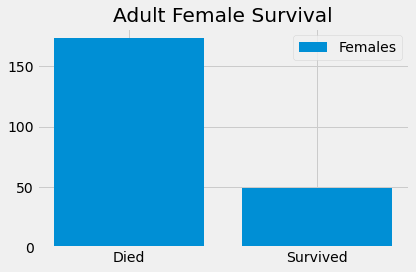

In [50]:
#Filter for Adult Males
femaledf = df[((df['Sex'] == 'female') & (df['Age'] >= 15))]

#Value Counts for Survival Status
female_y = femaledf['Survived'].value_counts()

#male survival counts
plt.bar(survival_x,female_y, label = 'Females')

plt.legend()
plt.title("Adult Female Survival")
plt.tight_layout()


plt.show()


In [51]:
male_y

0    342
1     72
Name: Survived, dtype: int64

In [52]:
female_y

1    173
0     49
Name: Survived, dtype: int64